# Plot 1: Demographics
### Do lower income people have a higher risk for all diseases as compared to higher income folks? Let's examine arthritis, skin cancer, and asthma for young people (<35 years old).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# first read in the data
df = pd.read_sas('LLCP2017.XPT',format='xport')
df.shape

(450016, 358)

In [3]:
# Select columns for income, arthritis, asthma, skin cancer, and age
df2 = df[['_INCOMG','_DRDXAR1','_LTASTH1','CHCSCNCR','_AGE80']].copy()

# Select entries that have a specific income
df2 = df2.loc[df2['_INCOMG']<7] 

# Select ages <=35
df2 = df2.loc[df2['_AGE80']<=35]

# format arthritis columns
df2['arthritis'] = df[['_DRDXAR1']]*-1+2

# format asthma column
df2['asthma'] = df[['_LTASTH1']]-1

# format skin cancer column
df2['skin_cancer'] = df[['CHCSCNCR']]*-1+2

# clean up data to get rid of entries that aren't 0 or 1
df2 = df2[(df2['arthritis']==1) | (df2['arthritis']==0) ]
df2 = df2[(df2['asthma']==1) | (df2['asthma']==0) ]
df2 = df2[(df2['skin_cancer']==1) | (df2['skin_cancer']==0) ]
df2 = df2.dropna()

In [4]:
# groupby income and calculate sum, count for each disease
df3 = df2[['_INCOMG','arthritis','asthma','skin_cancer']].groupby('_INCOMG').agg({'arthritis':['sum','count'],
                                                          'asthma':['sum','count'],
                                                          'skin_cancer':['sum','count']}).copy()
# get fraction of people with each disease
df3['prop_arth'] = df3['arthritis']['sum']/df3['arthritis']['count'] 
df3['prop_asthma'] = df3['asthma']['sum']/df3['asthma']['count'] 
df3['prop_skin_cancer'] = df3['skin_cancer']['sum']/df3['skin_cancer']['count'] 



# calculate standard errors
df3['std_error_arth'] = np.sqrt(df3['prop_arth']*(1-df3['prop_arth'])/df3['arthritis']['count'])
df3['std_error_asthma'] = np.sqrt(df3['prop_asthma']*(1-df3['prop_asthma'])/df3['asthma']['count'])
df3['std_error_skin_cancer'] = np.sqrt(df3['prop_skin_cancer']*(1-df3['prop_skin_cancer'])/df3['skin_cancer']['count'])

#select relevant columns
df3 = df3[['prop_skin_cancer','std_error_skin_cancer','prop_asthma','std_error_asthma',
          'prop_arth','std_error_arth']]

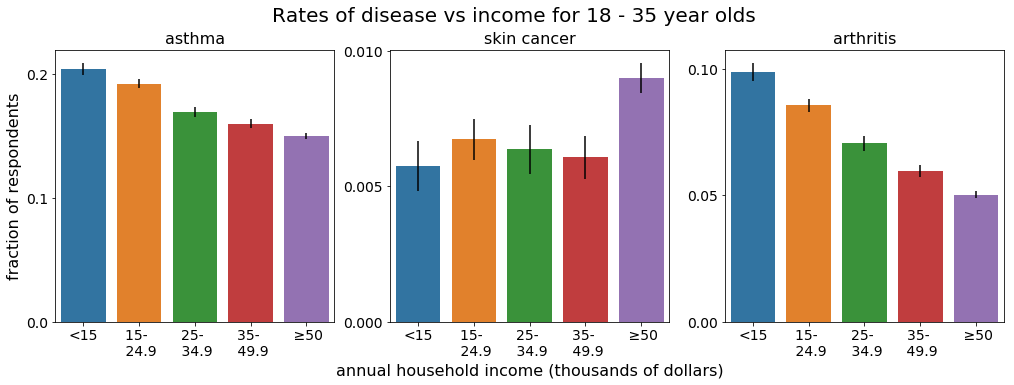

In [5]:
#plot figure as 3 subplots
fig = plt.figure(figsize=(17,5))
fig.suptitle('Rates of disease vs income for 18 - 35 year olds', fontsize=20,y=1)
plt.subplot(1,3,1)
sns.barplot(x='_INCOMG',y='prop_asthma',data = df3.reset_index(),
           yerr=df3['std_error_asthma'])
locs, labels = plt.xticks()
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=3)
plt.xticks(locs, ['<15','15- \n 24.9','25- \n 34.9','35- \n 49.9',' ≥50'],rotation=0,fontsize=14)
plt.xlabel('')
plt.ylabel('fraction of respondents',fontsize=16)
plt.title('asthma',fontsize=16)

plt.subplot(1,3,2)
sns.barplot(x='_INCOMG',y='prop_skin_cancer',data = df3.reset_index(),
           yerr=df3['std_error_skin_cancer'])
locs, labels = plt.xticks()
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=3)
plt.xticks(locs, ['<15','15- \n 24.9','25- \n 34.9','35- \n 49.9',' ≥50'],rotation=0,fontsize=14)
plt.xlabel('annual household income (thousands of dollars)',fontsize=16)
plt.ylabel('')
plt.title('skin cancer',fontsize=16)

plt.subplot(1,3,3)
sns.barplot(x='_INCOMG',y='prop_arth',data = df3.reset_index(),
           yerr=df3['std_error_arth'])
locs, labels = plt.xticks()
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=3)
plt.xticks(locs, ['<15','15- \n 24.9','25- \n 34.9','35- \n 49.9',' ≥50'],rotation=0,fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.title('arthritis',fontsize=16)
plt.savefig('test.png', bbox_inches='tight')


Here we see that annual household income has a significant affect on disease rates. For asthma and arthritis, increased income leads to higher rates of the disease. Skin cancer, however, has a higher rate of incidence in the highest income bracket.